# Single Validation

Validate a single simulation:
1. Correctly correlating MT growth state to grid size change
2. MT growth rate does not exceed `vp`
3. Grid size change occurs only in +/- 1 grids
4. Grid DNE blocks exist only in a single uninterrupted sequence

In [1]:
# imports
from pathlib import Path
from functools import partial
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
from simulation import Simulation


# set plotting style
plt.style.use(["default", "biophysics.mplstyle"])

# import simulation data to the Simulation class
data_file = Path("data/tests/simulation.mat")
sim = Simulation(data_file)

Running self check on 'simulation'

Warning: Grid count changed by 2 at step 634

Warning: Simulation 'simulation' failed self-check

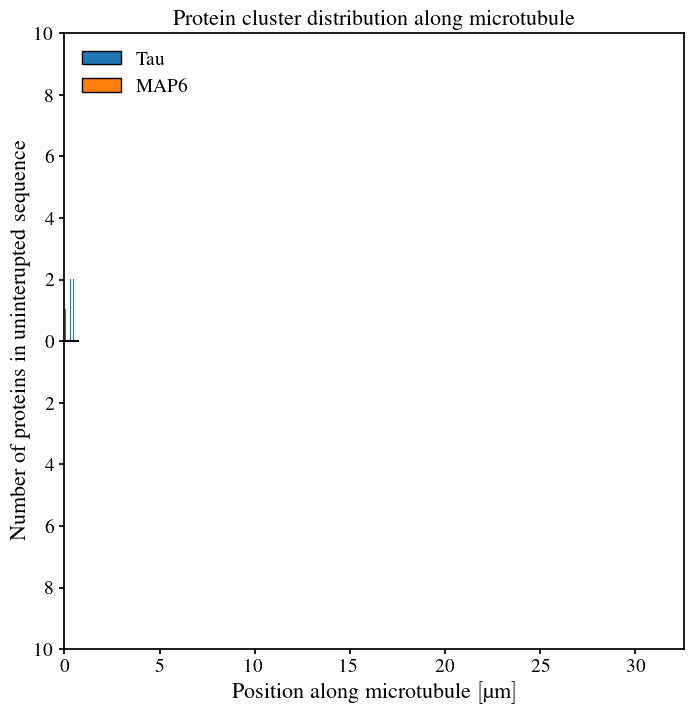

In [2]:
# plot sequence
fig, ax = plt.subplots()
sim.plot_sequence_at(step=50, ax=ax)

Generating Animation: 'test.mp4': 100%|██████████| 1001/1001 [09:21<00:00,  1.78it/s]


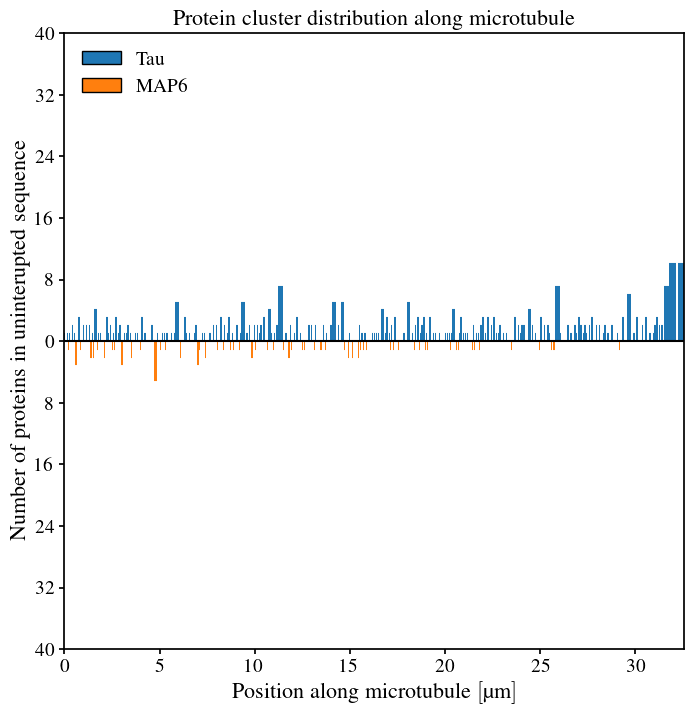

In [3]:
# animation
fig, ax = plt.subplots()

# define the animation save file
anim_file = Path("animations", "test.mp4")

# define the animation function
def animate(step: int, ax: Axes, sim: Simulation, ymax: float) -> None:
    # clear the axes
    ax.clear()

    # plot the simulation at the current time step
    sim.plot_sequence_at(
        step=step,
        ax=ax,
        ymax_override=ymax
    )

# define the function handle
ymax_override = sim.get_longest_seq()
anim_handle = partial(animate, ax=ax, sim=sim, ymax=ymax_override)

# generate the animation
sim.animate_sequences(fig, anim_handle, anim_file)